In [2]:
import PIL
from PIL import Image
#from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
img_gen = ImageDataGenerator(rescale=1./255)

In [7]:
img_size = (300,800)
train_data_gen = img_gen.flow_from_directory(directory='images/train/',
                                                    batch_size=6,
                                                    shuffle=True,
                                                    target_size= img_size,
                                                    class_mode='binary',
                                                    classes=['non_PL','PL'])
test_data_gen = img_gen.flow_from_directory(directory='images/test/',
                                                   batch_size=6,
                                                   shuffle=True,
                                                   target_size= img_size,
                                                   class_mode='binary',
                                                   classes=['non_PL','PL'])
predict_PL_gen = img_gen.flow_from_directory(directory='images/predict/PL',
                                                      target_size= img_size,
                                                      batch_size=6,
                                                      class_mode='binary',
                                                      classes=['PL'])
predict_non_PL_gen = img_gen.flow_from_directory(directory='images/predict/non_PL',
                                                      target_size= img_size,
                                                      batch_size=6,
                                                      class_mode='binary',
                                                      classes=['non_PL'])                                

Found 3910 images belonging to 2 classes.
Found 720 images belonging to 2 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [17]:
# import and configure model checkpoints
import os
checkpoint_prefix = os.path.join('model_checkpoints/', "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [3]:
base_full_res = keras.Sequential()
base_full_res.add(keras.layers.Conv2D(128,(4,4), padding='same', activation='relu', input_shape=(300,800,3)))
base_full_res.add(keras.layers.MaxPooling2D((6,6)))
base_full_res.add(keras.layers.Dense(128))
base_full_res.add(keras.layers.Conv2D(122,(2,2), activation='relu'))
base_full_res.add(keras.layers.MaxPooling2D((2,2)))
base_full_res.add(keras.layers.Flatten())
base_full_res.add(keras.layers.Dense(64))    
base_full_res.add(keras.layers.Dense(1, activation='sigmoid'))

base_full_res.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [4]:
base_full_res.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 800, 128)     6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 133, 128)      0         
_________________________________________________________________
dense (Dense)                (None, 50, 133, 128)      16512     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 132, 122)      62586     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 66, 122)       0         
_________________________________________________________________
flatten (Flatten)            (None, 193248)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [8]:
base1 = base_full_res.fit(train_data_gen, epochs=20,
                    validation_data=(test_data_gen)
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 652 steps, validate for 120 steps
Epoch 1/20
652/652 [==============================] - 207s 317ms/step - loss: 0.7815 - accuracy: 0.6123 - val_loss: 0.6618 - val_accuracy: 0.5542
Epoch 2/20
652/652 [==============================] - 175s 269ms/step - loss: 0.6946 - accuracy: 0.5604 - val_loss: 0.6865 - val_accuracy: 0.5556
Epoch 3/20
652/652 [==============================] - 176s 269ms/step - loss: 0.7020 - accuracy: 0.5606 - val_loss: 0.6870 - val_accuracy: 0.5556
Epoch 4/20
652/652 [==============================] - 175s 269ms/step - loss: 0.6868 - accuracy: 0.5619 - val_loss: 0.6870 - val_accuracy: 0.5556
Epoch 5/20
652/652 [==============================] - 175s 269ms/step - loss: 0.6862 - accuracy: 0.5596 - val_loss: 0.6883 - val_accuracy: 0.5556
Epoch 6/20
652/652 [==============================] - 175s 269ms/step - loss: 0.6863 - accuracy: 0.5596 - val_loss: 0.6870 - val_accuracy: 0.5556
Epoch 7/20
652/652 [==========

In [10]:
history4 = model.fit(train_data_gen, epochs=8,
                    validation_data=(test_data_gen),
                    #callbacks=[checkpoint_callback]
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 91 steps, validate for 13 steps
Epoch 1/8
91/91 [==============================] - 277s 3s/step - loss: 29.9283 - accuracy: 0.6692 - val_loss: 1.9717 - val_accuracy: 0.7724
Epoch 2/8
91/91 [==============================] - 273s 3s/step - loss: 1.0843 - accuracy: 0.7977 - val_loss: 0.6347 - val_accuracy: 0.7642
Epoch 3/8
91/91 [==============================] - 272s 3s/step - loss: 0.2961 - accuracy: 0.9085 - val_loss: 0.6519 - val_accuracy: 0.7967
Epoch 4/8
91/91 [==============================] - 272s 3s/step - loss: 0.1532 - accuracy: 0.9504 - val_loss: 0.9238 - val_accuracy: 0.7602
Epoch 5/8
91/91 [==============================] - 272s 3s/step - loss: 0.0986 - accuracy: 0.9675 - val_loss: 0.6023 - val_accuracy: 0.8089
Epoch 6/8
91/91 [==============================] - 273s 3s/step - loss: 0.0661 - accuracy: 0.9829 - val_loss: 0.6021 - val_accuracy: 0.8008
Epoch 7/8
91/91 [==============================] - 273s 3s/step - l

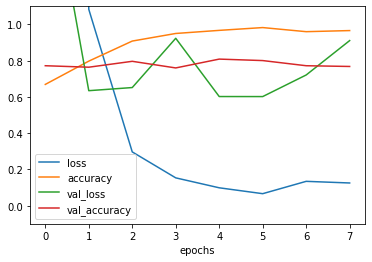

In [12]:
for key, value in history4.history.items():
    plt.plot(value, label=key)
    plt.ylim(-.1,1.1)
    plt.legend()
    plt.xlabel('epochs')

In [5]:
# install hub to docker image for transfer learning
!pip install --upgrade tensorflow-hub

     |################################| 89 kB 725 kB/s eta 0:00:01


In [6]:
import tensorflow_hub as hub

In [7]:
# build resnet model
m = tf.keras.Sequential([
          hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4",
          trainable=False),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])
m.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
             metrics=['accuracy'])

m.build([6, 224, 224, 3])  # Batch input shape.


In [26]:
m.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   multiple                  23564800  
_________________________________________________________________
dense_6 (Dense)              multiple                  131136    
_________________________________________________________________
dense_7 (Dense)              multiple                  65        
Total params: 23,696,001
Trainable params: 131,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [8]:
RN_D = m.fit(train_data_gen, epochs=20,
                    validation_data=(test_data_gen),
                    #callbacks=[checkpoint_callback]
                   )

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 652 steps, validate for 120 steps
Epoch 1/20
652/652 [==============================] - 134s 206ms/step - loss: 0.4444 - accuracy: 0.7977 - val_loss: 0.4581 - val_accuracy: 0.7833
Epoch 2/20
652/652 [==============================] - 121s 186ms/step - loss: 0.2856 - accuracy: 0.8788 - val_loss: 0.3933 - val_accuracy: 0.8236
Epoch 3/20
652/652 [==============================] - 122s 187ms/step - loss: 0.1899 - accuracy: 0.9192 - val_loss: 0.3378 - val_accuracy: 0.8556
Epoch 4/20
652/652 [==============================] - 121s 186ms/step - loss: 0.1144 - accuracy: 0.9619 - val_loss: 0.3891 - val_accuracy: 0.8667
Epoch 5/20
652/652 [==============================] - 121s 185ms/step - loss: 0.0699 - accuracy: 0.9754 - val_loss: 0.4283 - val_accuracy: 0.8708
Epoch 6/20
652/652 [==============================] - 121s 186ms/step - loss: 0.0360 - accuracy: 0.9905 - val_loss: 0.5309 - val_accuracy: 0.8653
Epoch 7/20
652/652 [==============================] - 121s 186ms/step - loss: 0.

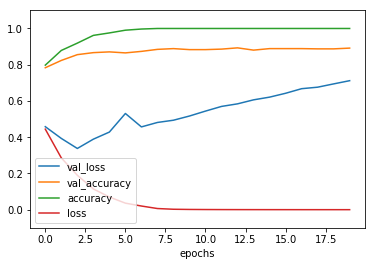

In [10]:
for key, value in RN_D.history.items():
    plt.plot(value, label=key)
    plt.ylim(-.1,1.1)
    plt.legend()
    plt.xlabel('epochs')

In [14]:
# Predict 200 unseen image labels
PL_predict = m.predict(predict_PL_gen)
non_PL_predict = m.predict(predict_non_PL_gen)

In [29]:
# Grab indexes of misclassified images
PL_indexes = np.nonzero(PL_predict < .5)
non_PL_indexes = np.nonzero(non_PL_predict > .5)

In [49]:
print(PL_indexes)
print(non_PL_indexes)

(array([ 8, 12, 30, 62, 91]), array([0, 0, 0, 0, 0]))
(array([ 4, 39, 43, 54, 72, 75, 88]), array([0, 0, 0, 0, 0, 0, 0]))


In [37]:
# Grab directories of misclassified images
PL_directories = list(tf.data.Dataset.list_files('images/predict/PL/' + '*/*'))
non_PL_directories = list(tf.data.Dataset.list_files('images/predict/non_PL/' + '*/*'))

In [47]:
for idx, direct in enumerate(PL_directories):
    if idx in PL_indexes[0]:
        print(direct)
    

tf.Tensor(b'images/predict/PL/PL/2_372.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/PL/PL/2_1134.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/PL/PL/2_1273.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/PL/PL/565.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/PL/PL/2_750.png', shape=(), dtype=string)


In [48]:
for idx, direct in enumerate(non_PL_directories):
    if idx in non_PL_indexes[0]:
        print(direct)

tf.Tensor(b'images/predict/non_PL/non_PL/155.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/non_PL/non_PL/677.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/non_PL/non_PL/2_1099.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/non_PL/non_PL/802.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/non_PL/non_PL/729.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/non_PL/non_PL/1100.png', shape=(), dtype=string)
tf.Tensor(b'images/predict/non_PL/non_PL/1301.png', shape=(), dtype=string)


In [11]:
# Save model scores
f = open("model_results/base.txt","w")
f.write( str(base1.history) )
f.close()